### PASCAL VOC 2007 불러오기

https://herbwood.tistory.com/6?category=867198

https://github.com/rockgoat95/RCNN/blob/main/src/RCNN.py

https://velog.io/@rockgoat2/Object-Detection-RCNN-%EB%A6%AC%EB%B7%B0-Python%EC%97%90%EC%84%9C%EC%9D%98-%EA%B5%AC%ED%98%84

코드 출처 : https://towardsdatascience.com/step-by-step-r-cnn-implementation-from-scratch-in-python-e97101ccde55

In [23]:
import cv2
import numpy as np
from torchvision.datasets import VOCDetection

dataset = VOCDetection('./data', year='2007',image_set='test', download=True)

img, target = dataset[1000]
img = np.array(img)

print(target)
print(img.shape)

cv2.imshow('img', img)
cv2.waitKey(0)


Using downloaded and verified file: ./data\VOCtest_06-Nov-2007.tar
Extracting ./data\VOCtest_06-Nov-2007.tar to ./data
{'annotation': {'folder': 'VOC2007', 'filename': '001983.jpg', 'source': {'database': 'The VOC2007 Database', 'annotation': 'PASCAL VOC2007', 'image': 'flickr', 'flickrid': '335006172'}, 'owner': {'flickrid': 'Baliwag boy', 'name': 'jojo puno'}, 'size': {'width': '500', 'height': '375', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'bus', 'pose': 'Left', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '61', 'ymin': '123', 'xmax': '348', 'ymax': '226'}}]}}
(375, 500, 3)


-1

### PASCAL VOC 2007 CAR 데이터 추출

In [1]:
import os
import shutil
import random
import numpy as np
import xmltodict
import utils

suffix_xml = '.xml'
suffix_jpeg = '.jpg'

car_test_path = './data/VOCdevkit/VOC2007/ImageSets/Main/car_test.txt'

voc_annotation_dir = './data/VOCdevkit/VOC2007/Annotations/'
voc_jpeg_dir = './data/VOCdevkit/VOC2007/JPEGImages/'

data_root_dir = './data/voc_car/'

In [2]:
def parse_train_val(data_path):
    samples = []

    with open(data_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            res = line.strip().split(' ')
            if len(res) == 3 and int(res[2]) == 1:
                samples.append(res[0])

    return samples

In [3]:
def sample_test(samples):

    length = len(samples)

    random_samples = random.sample(range(length), int(length / 10))
    # print(random_samples)
    new_dataset = samples[random_samples]

    return samples

In [4]:
def parse_car(sample_list):

    car_samples = list()
    for sample_name in sample_list:
        annotation_path = os.path.join(voc_annotation_dir, sample_name + suffix_xml)
        with open(annotation_path, 'rb') as f:
            xml_dict = xmltodict.parse(f)
            

        bndboxs = list()
        objects = xml_dict['annotation']['object']
        if isinstance(objects, list):
            for obj in objects:
                obj_name = obj['name']                     
                difficult = int(obj['difficult'])
                if 'car'.__eq__(obj_name) and difficult != 1:
                     car_samples.append(sample_name)
                elif isinstance(objects, dict):
                    obj_name = objects['name']
                    difficult = int(objects['difficult'])
                if 'car'.__eq__(obj_name) and difficult != 1:
                    car_samples.append(sample_name)
                else:
                    pass

    return car_samples

In [5]:
def save_car(car_samples, data_root_dir, data_annotation_dir, data_jpeg_dir):

    for sample_name in car_samples:
        src_annotation_path = os.path.join(voc_annotation_dir, sample_name + suffix_xml)
        dst_annotation_path = os.path.join(data_annotation_dir, sample_name + suffix_xml)
        shutil.copyfile(src_annotation_path, dst_annotation_path)

        src_jpeg_path = os.path.join(voc_jpeg_dir, sample_name + suffix_jpeg)
        dst_jpeg_path = os.path.join(data_jpeg_dir, sample_name + suffix_jpeg)
        shutil.copyfile(src_jpeg_path, dst_jpeg_path)

    csv_path = os.path.join(data_root_dir, 'car.csv')
    np.savetxt(csv_path, np.array(car_samples), fmt='%s')

In [6]:
car_test_path

'./data/VOCdevkit/VOC2007/ImageSets/Main/car_test.txt'

In [7]:
# samples에서 1인거만 뽑아낸듯?
samples = parse_train_val(car_test_path)

In [24]:
#samples = sample_test(samples)

In [9]:
samples1 = parse_car(samples)

In [10]:
data_annotation_dir = os.path.join(data_root_dir, 'Annotations')
data_jpeg_dir = os.path.join(data_root_dir, 'JPEGImages')

In [11]:
save_car(samples, data_root_dir, data_annotation_dir, data_jpeg_dir)

In [12]:
print(data_annotation_dir)
print(data_jpeg_dir)

./data/voc_car/Annotations
./data/voc_car/JPEGImages


In [29]:
len(train_images)

22057

In [15]:
train_images = []
train_labels = []
car_annotation_dir ='C:/Users/HeoJiHae/Desktop/heojihye/soodapeaple/Papers/RCNN/RCNN공부/data/voc_car/car_Annotations'

import os
import xml.etree.ElementTree as ET
import pandas as pd

for e,i in enumerate(os.listdir(data_annotation_dir)):
    tree = ET.parse(os.path.join(data_annotation_dir,i))
    root = tree.getroot()
    
    image_name = root.find('filename').text
    full_image_name = os.path.join(data_jpeg_dir, image_name)
    image_size = root.find('size')
    image_width = int(image_size.find('width').text) #size에서 다시 find를 하면 size의 width를 가져온다
    image_height = int(image_size.find('height').text)

#파일내에 있는 모든 object Element를 찾음
    objects_list = []
    for obj in root.findall('object'):#모든 object
        #if obj == 'car':
        #object element의 자식 element에서 bndbox를 찾음
        xmlbox = obj.find('bndbox')
        #bndbox element의 자식 element에서 xmin,ymin,xmax,ymax를 찾아 값인 text만 추출 
        x1 = int(xmlbox.find('xmin').text)
        y1 = int(xmlbox.find('ymin').text)
        x2 = int(xmlbox.find('xmax').text)
        y2 = int(xmlbox.find('ymax').text)

        bndbox_pos = (x1, y1, x2, y2)
        class_name=obj.find('name').text
        object_dict={'bndbox_pos':bndbox_pos} #딕셔너리
        if class_name == 'car':
            objects_list.append(object_dict) #리스트에 넣는다

    print('full_image_name:', full_image_name,'\n', 'image_size:', (image_width, image_height))

    for object in objects_list:
        print(object)
    objects_list = pd.DataFrame(objects_list)
    print(objects_list)
    objects_list.to_csv(os.path.join(car_annotation_dir,i[:-4])+'.csv',index=False, header=False)

full_image_name: ./data/voc_car/JPEGImages\000004.jpg 
 image_size: (500, 406)
{'bndbox_pos': (13, 311, 84, 362)}
{'bndbox_pos': (362, 330, 500, 389)}
{'bndbox_pos': (235, 328, 334, 375)}
{'bndbox_pos': (175, 327, 252, 364)}
{'bndbox_pos': (139, 320, 189, 359)}
{'bndbox_pos': (108, 325, 150, 353)}
{'bndbox_pos': (84, 323, 121, 350)}
             bndbox_pos
0    (13, 311, 84, 362)
1  (362, 330, 500, 389)
2  (235, 328, 334, 375)
3  (175, 327, 252, 364)
4  (139, 320, 189, 359)
5  (108, 325, 150, 353)
6   (84, 323, 121, 350)
full_image_name: ./data/voc_car/JPEGImages\000014.jpg 
 image_size: (500, 333)
{'bndbox_pos': (185, 194, 500, 316)}
{'bndbox_pos': (416, 180, 500, 222)}
{'bndbox_pos': (163, 197, 267, 244)}
             bndbox_pos
0  (185, 194, 500, 316)
1  (416, 180, 500, 222)
2  (163, 197, 267, 244)
full_image_name: ./data/voc_car/JPEGImages\000071.jpg 
 image_size: (500, 375)
{'bndbox_pos': (61, 75, 443, 274)}
           bndbox_pos
0  (61, 75, 443, 274)
full_image_name: ./data/voc_c

full_image_name: ./data/voc_car/JPEGImages\000736.jpg 
 image_size: (500, 333)
{'bndbox_pos': (3, 47, 500, 333)}
          bndbox_pos
0  (3, 47, 500, 333)
full_image_name: ./data/voc_car/JPEGImages\000743.jpg 
 image_size: (500, 375)
{'bndbox_pos': (55, 307, 86, 322)}
           bndbox_pos
0  (55, 307, 86, 322)
full_image_name: ./data/voc_car/JPEGImages\000747.jpg 
 image_size: (500, 333)
{'bndbox_pos': (47, 16, 440, 316)}
           bndbox_pos
0  (47, 16, 440, 316)
full_image_name: ./data/voc_car/JPEGImages\000757.jpg 
 image_size: (500, 333)
{'bndbox_pos': (47, 25, 479, 333)}
           bndbox_pos
0  (47, 25, 479, 333)
full_image_name: ./data/voc_car/JPEGImages\000778.jpg 
 image_size: (500, 333)
{'bndbox_pos': (97, 111, 452, 240)}
            bndbox_pos
0  (97, 111, 452, 240)
full_image_name: ./data/voc_car/JPEGImages\000788.jpg 
 image_size: (240, 320)
{'bndbox_pos': (58, 19, 77, 32)}
{'bndbox_pos': (3, 19, 33, 32)}
         bndbox_pos
0  (58, 19, 77, 32)
1   (3, 19, 33, 32)
full_i

 image_size: (375, 500)
{'bndbox_pos': (260, 130, 344, 167)}
{'bndbox_pos': (1, 136, 132, 177)}
             bndbox_pos
0  (260, 130, 344, 167)
1    (1, 136, 132, 177)
full_image_name: ./data/voc_car/JPEGImages\001572.jpg 
 image_size: (500, 375)
{'bndbox_pos': (6, 111, 429, 350)}
{'bndbox_pos': (2, 121, 157, 223)}
{'bndbox_pos': (148, 119, 210, 166)}
{'bndbox_pos': (421, 79, 460, 102)}
{'bndbox_pos': (440, 146, 489, 162)}
             bndbox_pos
0    (6, 111, 429, 350)
1    (2, 121, 157, 223)
2  (148, 119, 210, 166)
3   (421, 79, 460, 102)
4  (440, 146, 489, 162)
full_image_name: ./data/voc_car/JPEGImages\001605.jpg 
 image_size: (500, 375)
{'bndbox_pos': (205, 230, 237, 259)}
{'bndbox_pos': (314, 227, 338, 255)}
{'bndbox_pos': (275, 234, 295, 247)}
{'bndbox_pos': (266, 229, 278, 247)}
             bndbox_pos
0  (205, 230, 237, 259)
1  (314, 227, 338, 255)
2  (275, 234, 295, 247)
3  (266, 229, 278, 247)
full_image_name: ./data/voc_car/JPEGImages\001613.jpg 
 image_size: (500, 375)
{'b

0  (1, 12, 495, 286)
full_image_name: ./data/voc_car/JPEGImages\002526.jpg 
 image_size: (500, 375)
{'bndbox_pos': (85, 104, 388, 236)}
            bndbox_pos
0  (85, 104, 388, 236)
full_image_name: ./data/voc_car/JPEGImages\002531.jpg 
 image_size: (500, 375)
{'bndbox_pos': (12, 85, 490, 353)}
{'bndbox_pos': (3, 98, 121, 227)}
           bndbox_pos
0  (12, 85, 490, 353)
1   (3, 98, 121, 227)
full_image_name: ./data/voc_car/JPEGImages\002532.jpg 
 image_size: (500, 333)
{'bndbox_pos': (111, 175, 157, 205)}
{'bndbox_pos': (68, 172, 114, 203)}
             bndbox_pos
0  (111, 175, 157, 205)
1   (68, 172, 114, 203)
full_image_name: ./data/voc_car/JPEGImages\002543.jpg 
 image_size: (500, 333)
{'bndbox_pos': (256, 231, 500, 333)}
{'bndbox_pos': (1, 255, 256, 333)}
{'bndbox_pos': (238, 252, 302, 300)}
{'bndbox_pos': (160, 251, 231, 276)}
{'bndbox_pos': (1, 267, 62, 293)}
{'bndbox_pos': (3, 248, 53, 273)}
             bndbox_pos
0  (256, 231, 500, 333)
1    (1, 255, 256, 333)
2  (238, 252, 3

full_image_name: ./data/voc_car/JPEGImages\003357.jpg 
 image_size: (500, 375)
{'bndbox_pos': (24, 84, 477, 276)}
{'bndbox_pos': (433, 52, 500, 168)}
{'bndbox_pos': (263, 45, 450, 119)}
{'bndbox_pos': (143, 54, 278, 100)}
{'bndbox_pos': (1, 38, 213, 205)}
            bndbox_pos
0   (24, 84, 477, 276)
1  (433, 52, 500, 168)
2  (263, 45, 450, 119)
3  (143, 54, 278, 100)
4    (1, 38, 213, 205)
full_image_name: ./data/voc_car/JPEGImages\003364.jpg 
 image_size: (500, 375)
{'bndbox_pos': (100, 97, 447, 305)}
            bndbox_pos
0  (100, 97, 447, 305)
full_image_name: ./data/voc_car/JPEGImages\003375.jpg 
 image_size: (500, 375)
{'bndbox_pos': (93, 107, 390, 294)}
            bndbox_pos
0  (93, 107, 390, 294)
full_image_name: ./data/voc_car/JPEGImages\003385.jpg 
 image_size: (500, 332)
{'bndbox_pos': (150, 77, 235, 145)}
{'bndbox_pos': (350, 88, 448, 137)}
{'bndbox_pos': (284, 129, 500, 332)}
{'bndbox_pos': (1, 87, 190, 331)}
             bndbox_pos
0   (150, 77, 235, 145)
1   (350, 88, 

full_image_name: ./data/voc_car/JPEGImages\004104.jpg 
 image_size: (375, 500)
{'bndbox_pos': (1, 324, 32, 410)}
          bndbox_pos
0  (1, 324, 32, 410)
full_image_name: ./data/voc_car/JPEGImages\004107.jpg 
 image_size: (500, 375)
{'bndbox_pos': (96, 259, 407, 354)}
            bndbox_pos
0  (96, 259, 407, 354)
full_image_name: ./data/voc_car/JPEGImages\004115.jpg 
 image_size: (500, 375)
{'bndbox_pos': (146, 189, 349, 313)}
             bndbox_pos
0  (146, 189, 349, 313)
full_image_name: ./data/voc_car/JPEGImages\004147.jpg 
 image_size: (500, 385)
{'bndbox_pos': (75, 177, 355, 257)}
            bndbox_pos
0  (75, 177, 355, 257)
full_image_name: ./data/voc_car/JPEGImages\004154.jpg 
 image_size: (500, 375)
{'bndbox_pos': (1, 213, 120, 301)}
{'bndbox_pos': (171, 226, 222, 259)}
{'bndbox_pos': (266, 224, 286, 253)}
{'bndbox_pos': (203, 199, 254, 251)}
{'bndbox_pos': (252, 212, 279, 241)}
             bndbox_pos
0    (1, 213, 120, 301)
1  (171, 226, 222, 259)
2  (266, 224, 286, 253)
3

1    (2, 85, 43, 186)
full_image_name: ./data/voc_car/JPEGImages\005035.jpg 
 image_size: (500, 333)
{'bndbox_pos': (33, 35, 483, 292)}
{'bndbox_pos': (429, 18, 500, 73)}
{'bndbox_pos': (2, 27, 54, 105)}
           bndbox_pos
0  (33, 35, 483, 292)
1  (429, 18, 500, 73)
2    (2, 27, 54, 105)
full_image_name: ./data/voc_car/JPEGImages\005041.jpg 
 image_size: (500, 375)
{'bndbox_pos': (441, 175, 496, 227)}
{'bndbox_pos': (321, 162, 387, 220)}
{'bndbox_pos': (366, 156, 500, 374)}
             bndbox_pos
0  (441, 175, 496, 227)
1  (321, 162, 387, 220)
2  (366, 156, 500, 374)
full_image_name: ./data/voc_car/JPEGImages\005074.jpg 
 image_size: (500, 334)
{'bndbox_pos': (343, 194, 426, 240)}
{'bndbox_pos': (396, 201, 469, 233)}
{'bndbox_pos': (323, 194, 351, 222)}
{'bndbox_pos': (87, 191, 144, 209)}
{'bndbox_pos': (22, 189, 83, 222)}
{'bndbox_pos': (62, 200, 118, 226)}
             bndbox_pos
0  (343, 194, 426, 240)
1  (396, 201, 469, 233)
2  (323, 194, 351, 222)
3   (87, 191, 144, 209)
4    

full_image_name: ./data/voc_car/JPEGImages\006006.jpg 
 image_size: (500, 377)
{'bndbox_pos': (65, 55, 412, 334)}
           bndbox_pos
0  (65, 55, 412, 334)
full_image_name: ./data/voc_car/JPEGImages\006016.jpg 
 image_size: (500, 333)
{'bndbox_pos': (4, 40, 482, 301)}
{'bndbox_pos': (409, 181, 482, 288)}
             bndbox_pos
0     (4, 40, 482, 301)
1  (409, 181, 482, 288)
full_image_name: ./data/voc_car/JPEGImages\006017.jpg 
 image_size: (500, 375)
{'bndbox_pos': (29, 68, 462, 346)}
{'bndbox_pos': (1, 35, 115, 230)}
{'bndbox_pos': (404, 71, 446, 96)}
{'bndbox_pos': (135, 57, 190, 81)}
           bndbox_pos
0  (29, 68, 462, 346)
1   (1, 35, 115, 230)
2  (404, 71, 446, 96)
3  (135, 57, 190, 81)
full_image_name: ./data/voc_car/JPEGImages\006019.jpg 
 image_size: (500, 375)
{'bndbox_pos': (1, 68, 496, 375)}
          bndbox_pos
0  (1, 68, 496, 375)
full_image_name: ./data/voc_car/JPEGImages\006024.jpg 
 image_size: (500, 333)
{'bndbox_pos': (8, 294, 118, 333)}
           bndbox_pos
0

 image_size: (375, 500)
{'bndbox_pos': (193, 308, 375, 500)}
{'bndbox_pos': (1, 295, 128, 500)}
             bndbox_pos
0  (193, 308, 375, 500)
1    (1, 295, 128, 500)
full_image_name: ./data/voc_car/JPEGImages\006415.jpg 
 image_size: (500, 375)
{'bndbox_pos': (15, 150, 483, 288)}
            bndbox_pos
0  (15, 150, 483, 288)
full_image_name: ./data/voc_car/JPEGImages\006420.jpg 
 image_size: (500, 374)
{'bndbox_pos': (1, 176, 111, 269)}
           bndbox_pos
0  (1, 176, 111, 269)
full_image_name: ./data/voc_car/JPEGImages\006423.jpg 
 image_size: (500, 375)
{'bndbox_pos': (224, 117, 281, 155)}
{'bndbox_pos': (141, 107, 199, 142)}
{'bndbox_pos': (277, 127, 324, 163)}
             bndbox_pos
0  (224, 117, 281, 155)
1  (141, 107, 199, 142)
2  (277, 127, 324, 163)
full_image_name: ./data/voc_car/JPEGImages\006435.jpg 
 image_size: (500, 333)
{'bndbox_pos': (111, 185, 390, 291)}
             bndbox_pos
0  (111, 185, 390, 291)
full_image_name: ./data/voc_car/JPEGImages\006441.jpg 
 image_s

full_image_name: ./data/voc_car/JPEGImages\007368.jpg 
 image_size: (387, 500)
{'bndbox_pos': (169, 91, 260, 145)}
{'bndbox_pos': (268, 94, 346, 143)}
{'bndbox_pos': (316, 85, 387, 163)}
            bndbox_pos
0  (169, 91, 260, 145)
1  (268, 94, 346, 143)
2  (316, 85, 387, 163)
full_image_name: ./data/voc_car/JPEGImages\007386.jpg 
 image_size: (500, 330)
{'bndbox_pos': (1, 47, 500, 321)}
          bndbox_pos
0  (1, 47, 500, 321)
full_image_name: ./data/voc_car/JPEGImages\007399.jpg 
 image_size: (500, 375)
{'bndbox_pos': (47, 95, 475, 332)}
           bndbox_pos
0  (47, 95, 475, 332)
full_image_name: ./data/voc_car/JPEGImages\007423.jpg 
 image_size: (500, 400)
{'bndbox_pos': (221, 146, 339, 224)}
{'bndbox_pos': (27, 134, 158, 188)}
             bndbox_pos
0  (221, 146, 339, 224)
1   (27, 134, 158, 188)
full_image_name: ./data/voc_car/JPEGImages\007429.jpg 
 image_size: (332, 500)
{'bndbox_pos': (16, 228, 310, 481)}
            bndbox_pos
0  (16, 228, 310, 481)
full_image_name: ./data

full_image_name: ./data/voc_car/JPEGImages\008212.jpg 
 image_size: (375, 500)
{'bndbox_pos': (235, 242, 269, 260)}
{'bndbox_pos': (167, 247, 203, 263)}
{'bndbox_pos': (78, 294, 114, 322)}
{'bndbox_pos': (212, 415, 232, 459)}
{'bndbox_pos': (199, 465, 231, 500)}
{'bndbox_pos': (67, 256, 79, 271)}
             bndbox_pos
0  (235, 242, 269, 260)
1  (167, 247, 203, 263)
2   (78, 294, 114, 322)
3  (212, 415, 232, 459)
4  (199, 465, 231, 500)
5    (67, 256, 79, 271)
full_image_name: ./data/voc_car/JPEGImages\008215.jpg 
 image_size: (500, 405)
{'bndbox_pos': (67, 20, 165, 69)}
{'bndbox_pos': (4, 23, 91, 83)}
          bndbox_pos
0  (67, 20, 165, 69)
1    (4, 23, 91, 83)
full_image_name: ./data/voc_car/JPEGImages\008231.jpg 
 image_size: (500, 375)
{'bndbox_pos': (4, 29, 500, 375)}
{'bndbox_pos': (6, 79, 57, 117)}
          bndbox_pos
0  (4, 29, 500, 375)
1   (6, 79, 57, 117)
full_image_name: ./data/voc_car/JPEGImages\008246.jpg 
 image_size: (500, 255)
{'bndbox_pos': (424, 103, 495, 135)}
 

full_image_name: ./data/voc_car/JPEGImages\009077.jpg 
 image_size: (500, 333)
{'bndbox_pos': (394, 135, 500, 192)}
{'bndbox_pos': (260, 139, 294, 172)}
{'bndbox_pos': (227, 135, 282, 163)}
{'bndbox_pos': (121, 140, 210, 169)}
             bndbox_pos
0  (394, 135, 500, 192)
1  (260, 139, 294, 172)
2  (227, 135, 282, 163)
3  (121, 140, 210, 169)
full_image_name: ./data/voc_car/JPEGImages\009081.jpg 
 image_size: (500, 375)
{'bndbox_pos': (77, 63, 461, 324)}
           bndbox_pos
0  (77, 63, 461, 324)
full_image_name: ./data/voc_car/JPEGImages\009092.jpg 
 image_size: (500, 262)
{'bndbox_pos': (402, 172, 436, 231)}
             bndbox_pos
0  (402, 172, 436, 231)
full_image_name: ./data/voc_car/JPEGImages\009096.jpg 
 image_size: (344, 208)
{'bndbox_pos': (11, 35, 339, 188)}
           bndbox_pos
0  (11, 35, 339, 188)
full_image_name: ./data/voc_car/JPEGImages\009111.jpg 
 image_size: (500, 334)
{'bndbox_pos': (457, 172, 489, 196)}
             bndbox_pos
0  (457, 172, 489, 196)
full_imag

3     (1, 192, 74, 262)
full_image_name: ./data/voc_car/JPEGImages\009779.jpg 
 image_size: (500, 375)
{'bndbox_pos': (97, 186, 323, 329)}
{'bndbox_pos': (349, 177, 494, 311)}
             bndbox_pos
0   (97, 186, 323, 329)
1  (349, 177, 494, 311)
full_image_name: ./data/voc_car/JPEGImages\009804.jpg 
 image_size: (500, 333)
{'bndbox_pos': (12, 135, 388, 333)}
            bndbox_pos
0  (12, 135, 388, 333)
full_image_name: ./data/voc_car/JPEGImages\009806.jpg 
 image_size: (500, 333)
{'bndbox_pos': (401, 204, 411, 236)}
{'bndbox_pos': (457, 202, 472, 213)}
{'bndbox_pos': (102, 185, 130, 231)}
{'bndbox_pos': (30, 203, 103, 236)}
{'bndbox_pos': (1, 179, 22, 225)}
             bndbox_pos
0  (401, 204, 411, 236)
1  (457, 202, 472, 213)
2  (102, 185, 130, 231)
3   (30, 203, 103, 236)
4     (1, 179, 22, 225)
full_image_name: ./data/voc_car/JPEGImages\009821.jpg 
 image_size: (456, 342)
{'bndbox_pos': (15, 117, 447, 262)}
            bndbox_pos
0  (15, 117, 447, 262)
full_image_name: ./data/vo

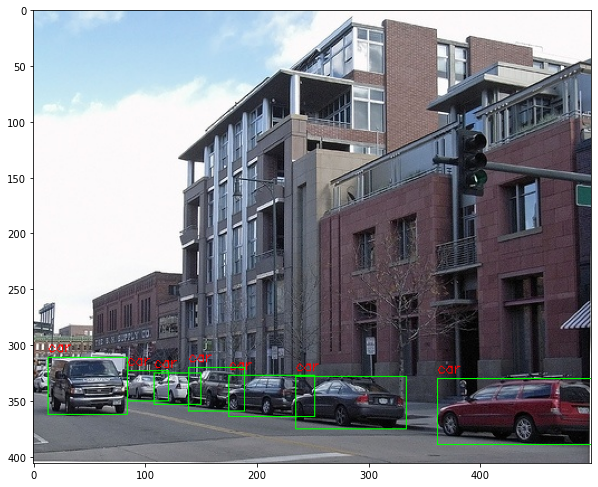

In [30]:
import cv2
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

xml_file = os.path.join(data_annotation_dir, '000004.xml')

tree = ET.parse(xml_file)
root = tree.getroot()

image_name = root.find('filename').text
full_image_name = os.path.join(data_jpeg_dir, image_name)

img = cv2.imread(full_image_name)
#opencv의 rectangle()는 인자로 들어온 이미지 배열에 그대로 사각형을 그리기 때문에 별도의 이미지 배열을 만든다
draw_img = img.copy()
green_color=(0, 255, 0) #OpenCV는 RGB가 아니라 BGR이므로 빨간색은 (0, 0, 255)
red_color=(0, 0, 255)

#파일 내에 있는 모든 object Element=<object>를 찾음
objects_list = []
for obj in root.findall('object'):
    xmlbox = obj.find('bndbox')
    
    left = int(xmlbox.find('xmin').text) #bbox의 좌표값
    top = int(xmlbox.find('ymin').text)
    right = int(xmlbox.find('xmax').text)
    bottom = int(xmlbox.find('ymax').text)
    
    class_name=obj.find('name').text #오브젝트의 이름을 가져온다
    
    #draw_img 배열의 좌상단 우하단 좌표에 초록색으로 box 표시 
    cv2.rectangle(draw_img, (left, top), (right, bottom), color=green_color, thickness=1)
    #draw_img 배열의 좌상단 좌표에 빨간색으로 클래스명(이름) 표시. 좌상단의 top보다 높은 곳에 적는다
    cv2.putText(draw_img, class_name, (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, thickness=1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)

In [31]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [32]:
def get_iou(bb1, bb2):
    # 겹치는 부분(교집합) 넓이를 구하기 위한 식
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])
    if x_right < x_left or y_bottom < y_top:
        return 0.0
    intersection_area = (x_right - x_left) * (y_bottom - y_top) # 교집합 부분
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1']) # bb1의 넓이
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1']) ## bb2의 넓이
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area) # IoU 계산하기
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [19]:
annot='C:/Users/HeoJiHae/Desktop/heojihye/soodapeaple/Papers/RCNN/RCNN공부/data/voc_car/car_Annotations/'
train_images=[]
train_labels=[]
for e,i in enumerate(os.listdir(annot)):
        # startwith : 문자열 데이터 타입에 대해 쓸 수 있음. 특정 문자열 찾기
        image = cv2.imread(full_image_name) # 이미지 불러오기
        df = pd.read_csv(os.path.join(annot,i),header=None) # 정답 라벨 불러오기)
        # iterrows() : df dx에 인덱스를 받는다.
        gtvalues=[]
        for row in range(df.shape[0]): 
            x1 = int(df[0][row].split(", ")[0][1:])
            y1 = int(df[0][row].split(", ")[1])
            x2 = int(df[0][row].split(", ")[2])
            y2 = int(df[0][row].split(", ")[3][:-1])
            gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2}) 
        ss.setBaseImage(image)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = image.copy()
        counter = 0
        falsecounter = 0
        flag = 0
        fflag = 0
        bflag = 0
        for e,result in enumerate(ssresults):
            if e < 2000 and flag == 0: # 2000개 뽑을거야 flag(신호)가 뭐징
                for gtval in gtvalues:
                    x,y,w,h = result
                    iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                    if counter < 30:
                        if iou > 0.70:
                            timage = imout[y:y+h,x:x+w] #image에 region proposal 부분 뜯음
                            resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA) # resize
                            train_images.append(resized)
                            train_labels.append(1)
                            counter += 1
                    else : 
                        fflag =1
                    if falsecounter <30:
                        if iou < 0.3: # 0.3보다 작으면 배경을 라벨링함
                            timage = imout[y:y+h,x:x+w]
                            resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                            train_images.append(resized)
                            train_labels.append(0)
                            falsecounter += 1
                    else :
                        bflag = 1
                if fflag == 1 and bflag == 1:
                    print("inside")
                    flag = 1

In [33]:
print(train_labels.count(0))
print(train_labels.count(1))

21630
427


In [34]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [35]:
print(X_new.shape)
print(y_new.shape)

(22057, 224, 224, 3)
(22057,)


In [36]:
X_new[0].shape

(224, 224, 3)

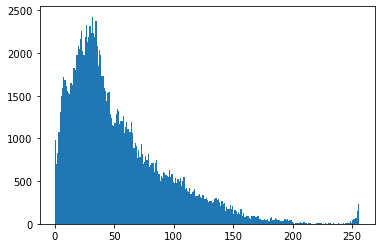

In [48]:
plt.hist(X_new[30].ravel(),256,[0,256]) # ravel(): numpy값을 1차원 벡터로 변환
plt.show()

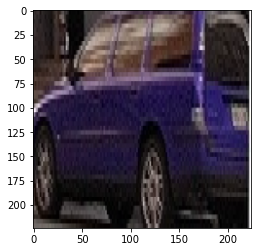

1


In [47]:
plt.imshow(X_new[30])
plt.show()
print(y_new[30])

In [49]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from torchvision.models import alexnet
import torch
import torch.nn as nn
model = alexnet()

In [50]:
# num_classes = 2
# num_features = model.classifier[6].in_features
# model.classifier[6] = nn.Linear(num_features, num_classes)

In [51]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=True)

In [52]:
vggmodel.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [53]:
import keras
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False
X= vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(X)
model_final = Model(inputs = vggmodel.input, outputs = predictions)
opt = Adam(lr=0.0001)
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])
model_final.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.25)

In [55]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [56]:
traindata

In [57]:
testdata

In [58]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=50, verbose=1, mode='auto')
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 10, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])

C:\Users\HeoJiHae\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 [==============================] - 62s 6s/step - loss: 0.8558 - accuracy: 0.8349 - val_loss: 2.3663 - val_accuracy: 0.9531

Epoch 00001: val_loss improved from inf to 2.36634, saving model to ieeercnn_vgg16_1.h5
Epoch 2/10
10/10 [==============================] - 56s 6s/step - loss: 0.2519 - accuracy: 0.9863 - val_loss: 0.3058 - val_accuracy: 0.9844

Epoch 00002: val_loss improved from 2.36634 to 0.30583, saving model to ieeercnn_vgg16_1.h5
Epoch 3/10
10/10 [==============================] - 56s 6s/step - loss: 0.4236 - accuracy: 0.9701 - val_loss: 0.2277 - val_accuracy: 0.9844

Epoch 00003: val_loss improved from 0.30583 to 0.22773, saving model to ieeercnn_vgg16_1.h5
Epoch 4/10
10/10 [==============================] - 56s 6s/step - loss: 0.2139 - accuracy: 0.9804 - val_loss: 0.0859 - val_accuracy: 0.9844

Epoch 00004: val_loss improved from 0.22773 to 0.08590, saving model to ieeercnn_vgg16_1.h5
Epoch 5/10
10/10 [==============================] - 57s 6s/step - loss: 

[[1.0423371e-06 9.9999893e-01]]
473 338 25 13
[[0.09097116 0.9090288 ]]
262 102 119 106
[[2.7209648e-04 9.9972790e-01]]
369 279 20 68
[[0.00208772 0.9979122 ]]
232 125 22 39
[[0.24433756 0.75566244]]
362 339 137 67
[[1.8170823e-09 1.0000000e+00]]
0 246 48 12
[[1.3486112e-05 9.9998653e-01]]
226 125 32 226
[[9.632872e-17 1.000000e+00]]
246 112 18 79
[[6.011890e-04 9.993988e-01]]
235 59 3 35
[[3.8745554e-08 1.0000000e+00]]
256 190 2 128
[[6.6798355e-04 9.9933201e-01]]
378 25 25 37
[[3.1593976e-05 9.9996841e-01]]
254 119 30 36
[[0.00311427 0.9968857 ]]
403 363 64 25
[[0.05617324 0.9438268 ]]
355 58 133 147
[[0.04291276 0.9570872 ]]
74 81 85 63
[[4.3206986e-05 9.9995685e-01]]
370 140 10 68
[[0.06107062 0.9389294 ]]
259 151 115 165
[[9.399735e-04 9.990601e-01]]
140 296 8 32
[[6.3917810e-06 9.9999356e-01]]
178 168 10 82
[[3.082788e-05 9.999691e-01]]
212 310 8 17
[[4.1503054e-06 9.9999583e-01]]
152 295 11 11
[[2.6448977e-06 9.9999738e-01]]
94 315 38 17
[[3.7817063e-07 9.9999964e-01]]
414 345 5

[[6.700804e-11 1.000000e+00]]
21 276 32 16
[[9.228811e-11 1.000000e+00]]
328 183 19 47
[[6.8943184e-09 1.0000000e+00]]
318 183 29 58
[[2.4380741e-08 1.0000000e+00]]
246 312 39 28
[[0.00207957 0.99792045]]
376 50 124 221
[[0.01202043 0.98797953]]
17 314 79 49
[[7.7972982e-05 9.9992204e-01]]
296 144 8 26
[[6.534459e-13 1.000000e+00]]
73 72 46 14
[[5.737514e-12 1.000000e+00]]
71 299 58 32
[[2.8844396e-10 1.0000000e+00]]
489 60 11 34
[[4.9416526e-06 9.9999511e-01]]
132 238 24 76
[[0.00181712 0.99818283]]
325 278 73 75
[[8.265355e-05 9.999174e-01]]
111 107 26 21
[[2.1200903e-12 1.0000000e+00]]
32 276 21 7
[[5.0104954e-10 1.0000000e+00]]
346 291 17 24
[[2.3735143e-05 9.9997628e-01]]
302 38 10 20
[[5.333217e-10 1.000000e+00]]
287 195 20 38
[[2.7452863e-05 9.9997258e-01]]
167 110 8 44
[[8.266808e-06 9.999918e-01]]
342 106 39 102
[[3.1901876e-23 1.0000000e+00]]
234 12 53 44
[[1.7561748e-05 9.9998248e-01]]
154 67 247 309
[[1.036923e-17 1.000000e+00]]
242 17 46 45
[[0.06557444 0.93442553]]
415 15

[[3.5656794e-07 9.9999964e-01]]
157 342 28 18
[[0.00617484 0.9938252 ]]
417 145 83 126
[[1.7449662e-07 9.9999988e-01]]
486 92 14 24
[[2.9128323e-08 1.0000000e+00]]
83 289 27 39
[[0.07466261 0.9253374 ]]
379 105 87 101
[[1.3035318e-08 1.0000000e+00]]
257 184 17 104
[[4.8541943e-12 1.0000000e+00]]
451 312 40 23
[[1.4475237e-06 9.9999857e-01]]
166 154 40 181
[[0.00227002 0.99772996]]
34 314 41 14
[[2.0235033e-05 9.9997973e-01]]
287 260 23 23
[[9.003604e-04 9.990996e-01]]
112 335 47 20
[[2.6718181e-08 1.0000000e+00]]
26 298 57 14
[[4.368738e-06 9.999956e-01]]
128 106 59 225
[[2.4986896e-10 1.0000000e+00]]
0 81 179 170
[[1.0614514e-07 9.9999988e-01]]
152 341 127 32
[[1.1870296e-10 1.0000000e+00]]
419 90 13 32
[[1.8916433e-04 9.9981087e-01]]
259 0 241 49
[[6.5224358e-06 9.9999344e-01]]
69 213 65 36
[[0.00220456 0.99779546]]
179 145 13 23
[[2.2914962e-06 9.9999774e-01]]
72 312 166 51
[[5.7602083e-05 9.9994242e-01]]
191 172 24 20
[[1.2566486e-06 9.9999869e-01]]
351 62 12 51
[[3.5451676e-14 1.0

[[1.8691261e-04 9.9981314e-01]]
178 92 14 59
[[3.9262006e-05 9.9996078e-01]]
384 376 42 9
[[1.7961945e-08 1.0000000e+00]]
89 80 70 13
[[3.154348e-04 9.996846e-01]]
387 72 52 58
[[4.9300969e-04 9.9950695e-01]]
0 280 18 27
[[1.0084585e-04 9.9989915e-01]]
192 190 8 43
[[5.7746797e-15 1.0000000e+00]]
312 0 30 10
[[2.1681699e-06 9.9999785e-01]]
363 357 104 31
[[1.0473962e-10 1.0000000e+00]]
212 288 13 16
[[3.409621e-05 9.999659e-01]]
421 29 36 13
[[2.6883200e-07 9.9999976e-01]]
303 87 9 21
[[0.02931278 0.9706872 ]]
81 315 66 40
[[1.7669026e-05 9.9998236e-01]]
445 262 14 67
[[4.8582056e-08 1.0000000e+00]]
45 76 131 26
[[4.8475595e-05 9.9995148e-01]]
324 182 20 46
[[1.2415323e-04 9.9987578e-01]]
60 203 84 53
[[4.913597e-04 9.995086e-01]]
422 262 36 18
[[1.07072765e-05 9.99989271e-01]]
199 302 26 32
[[1.0428143e-12 1.0000000e+00]]
233 365 40 7
[[1.0436637e-04 9.9989557e-01]]
300 367 29 8
[[3.545877e-05 9.999646e-01]]
291 279 17 49
[[7.974484e-10 1.000000e+00]]
154 67 248 309
[[1.4046628e-06 9.

[[4.5551233e-06 9.9999547e-01]]
486 174 14 95
[[3.34302e-08 1.00000e+00]]
0 349 498 57
[[0.00301219 0.9969879 ]]
345 92 50 24
[[2.8681496e-04 9.9971312e-01]]
284 115 30 17
[[1.1055802e-04 9.9988937e-01]]
397 314 74 29
[[1.3025246e-04 9.9986970e-01]]
178 140 23 110
[[9.9245044e-05 9.9990070e-01]]
83 341 289 41
[[6.8444037e-04 9.9931562e-01]]
178 166 9 30
[[0.00316281 0.99683714]]
165 230 8 25
[[4.452754e-06 9.999956e-01]]
260 120 24 7
[[0.1704017 0.8295983]]
138 335 21 20
[[0.07365598 0.926344  ]]
399 154 87 114
[[3.0261968e-09 1.0000000e+00]]
317 256 19 25
[[2.7997858e-05 9.9997199e-01]]
363 62 9 16
[[9.2539119e-07 9.9999905e-01]]
362 25 138 103
[[1.3534792e-06 9.9999869e-01]]
359 131 22 8
[[5.119962e-04 9.994880e-01]]
0 262 53 61
[[2.0880876e-10 1.0000000e+00]]
0 358 498 48
[[5.3733186e-07 9.9999940e-01]]
157 113 9 131
[[0.08888955 0.9111105 ]]
239 61 47 41
[[1.6043388e-07 9.9999988e-01]]
428 326 55 7
[[7.3558226e-09 1.0000000e+00]]
85 340 26 10
[[3.0110446e-06 9.9999702e-01]]
300 84 

[[7.241520e-05 9.999275e-01]]
178 59 54 109
[[1.4808791e-04 9.9985194e-01]]
427 170 6 30
[[3.411236e-04 9.996588e-01]]
487 159 13 18
[[0.01379943 0.9862006 ]]
289 56 26 65
[[5.3501659e-04 9.9946505e-01]]
178 165 9 31
[[9.8830424e-07 9.9999905e-01]]
112 362 40 10
[[0.0011188  0.99888116]]
411 332 64 12
[[5.754424e-16 1.000000e+00]]
37 197 12 12
[[1.14264585e-04 9.99885678e-01]]
254 121 57 66
[[4.9809704e-04 9.9950194e-01]]
404 99 96 48
[[4.2107524e-04 9.9957889e-01]]
359 119 22 20
[[6.6171604e-04 9.9933821e-01]]
484 97 16 50
[[0.00218569 0.9978143 ]]
133 153 29 104
[[1.6207166e-07 9.9999988e-01]]
230 24 12 19
[[4.8407648e-05 9.9995160e-01]]
50 236 96 93
[[0.00199848 0.9980015 ]]
231 0 87 55
[[1.5911022e-04 9.9984086e-01]]
179 59 53 92
[[8.5043251e-07 9.9999917e-01]]
392 146 97 197
[[6.7844876e-04 9.9932158e-01]]
404 38 96 31
[[4.7719906e-04 9.9952281e-01]]
149 106 30 225
[[1.4428928e-04 9.9985564e-01]]
85 299 16 29
[[2.9908863e-04 9.9970090e-01]]
426 326 25 7
[[0.0205457  0.97945434]]
1

[[1.3334205e-04 9.9986660e-01]]
403 363 95 26
[[3.0819789e-04 9.9969184e-01]]
402 52 61 17
[[2.5996374e-05 9.9997401e-01]]
213 173 18 113
[[0.01468295 0.98531705]]
375 287 70 59
[[0.01474382 0.9852562 ]]
93 310 39 21
[[4.341780e-07 9.999995e-01]]
0 221 112 37
[[0.00296494 0.997035  ]]
462 45 38 11
[[0.00606048 0.9939395 ]]
404 48 66 21
[[9.8244038e-07 9.9999905e-01]]
394 152 95 176
[[0.00400766 0.99599236]]
325 276 64 77
[[4.8810357e-06 9.9999511e-01]]
33 291 159 61
[[0.09395537 0.90604466]]
462 334 10 23
[[0.00606269 0.99393725]]
232 96 14 39
[[0.00738705 0.99261296]]
136 80 50 47
[[0.00134592 0.998654  ]]
199 284 38 56
[[8.4413466e-04 9.9915588e-01]]
0 314 85 49
[[0.0345919  0.96540815]]
386 284 13 52
[[9.190622e-06 9.999908e-01]]
131 98 102 243
[[9.436053e-04 9.990564e-01]]
380 141 24 65
[[0.00239092 0.997609  ]]
131 80 45 51
[[1.1209648e-05 9.9998879e-01]]
285 203 28 41
[[8.0102825e-07 9.9999917e-01]]
259 0 15 15
[[4.7305045e-14 1.0000000e+00]]
0 67 192 296
[[0.04692059 0.95307934]

[[5.3033307e-11 1.0000000e+00]]
176 154 62 186
[[0.02797341 0.9720266 ]]
192 96 54 57
[[0.00219972 0.9978003 ]]
111 107 27 28
[[0.03587667 0.96412337]]
263 38 15 23
[[2.2225270e-04 9.9977773e-01]]
32 334 49 11
[[7.8899626e-05 9.9992108e-01]]
123 205 55 129
[[1.669397e-05 9.999833e-01]]
166 105 9 49
[[0.00724807 0.99275196]]
191 98 41 71
[[1.5136668e-05 9.9998486e-01]]
121 247 12 10
[[2.4978747e-10 1.0000000e+00]]
0 358 30 6
[[0.12675332 0.8732466 ]]
72 328 69 24
[[1.6982791e-06 9.9999833e-01]]
211 115 83 225
[[0.03146772 0.96853226]]
451 286 47 49
[[5.130792e-18 1.000000e+00]]
468 175 15 28
[[0.00171824 0.99828184]]
136 150 17 47
[[2.2402577e-04 9.9977595e-01]]
312 13 57 115
[[0.00155427 0.9984458 ]]
363 361 74 24
[[3.2404205e-04 9.9967599e-01]]
385 335 83 17
[[0.03942427 0.96057576]]
416 148 34 22
[[0.00409559 0.9959044 ]]
16 250 61 42
[[0.00306857 0.99693143]]
327 314 5 34
[[0.05137743 0.9486226 ]]
328 275 18 54
[[0.03854559 0.9614544 ]]
321 183 26 47
[[0.00121586 0.9987841 ]]
398 96

[[3.1928803e-06 9.9999678e-01]]
271 390 25 11
[[7.8093462e-06 9.9999213e-01]]
0 0 262 104
[[0.01373173 0.9862683 ]]
380 269 19 15
[[2.8488512e-06 9.9999714e-01]]
225 382 274 24
[[2.7426085e-04 9.9972576e-01]]
179 92 16 76
[[8.9948205e-04 9.9910057e-01]]
368 314 130 43
[[2.7347925e-08 1.0000000e+00]]
367 145 133 239
[[2.504667e-06 9.999975e-01]]
361 24 139 104
[[0.0221115  0.97788846]]
326 273 51 85
[[0.01314173 0.98685825]]
416 70 27 12
[[3.6315004e-08 1.0000000e+00]]
335 139 71 206
[[0.06225414 0.9377459 ]]
380 269 20 49
[[3.145933e-04 9.996854e-01]]
90 324 131 25
[[2.9473534e-04 9.9970526e-01]]
367 335 133 49
[[0.00139711 0.9986029 ]]
273 70 67 58
[[2.219086e-04 9.997781e-01]]
428 170 5 30
[[5.912348e-04 9.994087e-01]]
413 90 19 31
[[0.00563374 0.9943663 ]]
179 5 136 146
[[7.290551e-09 1.000000e+00]]
129 0 371 406
[[0.02880659 0.9711934 ]]
355 134 24 14
[[1.7587662e-09 1.0000000e+00]]
355 58 145 147
[[9.1138284e-04 9.9908864e-01]]
390 24 57 36
[[0.01310356 0.98689646]]
232 68 76 67
[

[[2.1593569e-05 9.9997842e-01]]
394 152 104 185
[[0.0068335 0.9931665]]
165 178 9 63
[[4.7669573e-07 9.9999952e-01]]
392 145 108 124
[[8.097737e-04 9.991903e-01]]
191 284 46 56
[[4.3411095e-05 9.9995661e-01]]
191 98 41 145
[[9.4637618e-04 9.9905366e-01]]
30 213 104 37
[[6.855952e-04 9.993144e-01]]
408 90 19 36
[[9.5670216e-04 9.9904329e-01]]
363 352 134 36
[[9.9285285e-04 9.9900717e-01]]
345 25 87 91
[[5.737952e-12 1.000000e+00]]
0 60 186 230
[[1.0687139e-07 9.9999988e-01]]
190 151 34 175
[[0.01707098 0.982929  ]]
369 139 37 120
[[0.00151215 0.99848783]]
72 302 94 50
[[0.06104845 0.93895155]]
379 141 18 87
[[8.808501e-05 9.999119e-01]]
366 321 134 50
[[4.185261e-04 9.995815e-01]]
287 246 49 105
[[0.00760516 0.9923948 ]]
352 63 91 39
[[7.411821e-07 9.999993e-01]]
176 95 57 242
[[1.7645720e-05 9.9998236e-01]]
231 113 25 176
[[0.00113166 0.99886835]]
0 263 31 88
[[2.8418579e-05 9.9997163e-01]]
367 264 133 120
[[0.00143148 0.99856853]]
356 232 43 50
[[8.8718355e-07 9.9999917e-01]]
345 64 1

[[0.00661614 0.9933838 ]]
324 254 22 74
[[6.2382414e-06 9.9999380e-01]]
473 261 27 145
[[3.2788706e-05 9.9996722e-01]]
318 238 67 115
[[4.4321208e-04 9.9955672e-01]]
386 284 85 59
[[2.1342400e-06 9.9999785e-01]]
0 301 221 62
[[0.01354564 0.9864544 ]]
286 6 42 106
[[1.0204014e-09 1.0000000e+00]]
220 0 280 406
[[0.00610942 0.9938905 ]]
199 288 39 52
[[2.6271306e-04 9.9973732e-01]]
322 361 178 28
[[0.00263708 0.9973629 ]]
94 164 67 168
[[0.00686505 0.993135  ]]
178 59 54 135
[[2.7557090e-07 9.9999976e-01]]
139 335 193 36
[[2.5725403e-04 9.9974269e-01]]
411 323 74 21
[[2.3007923e-04 9.9976999e-01]]
296 132 39 38
[[4.4797745e-04 9.9955195e-01]]
0 269 83 74
[[8.8347281e-07 9.9999917e-01]]
386 60 114 283
[[0.09434745 0.9056526 ]]
72 332 68 21
[[4.6282544e-06 9.9999535e-01]]
154 12 146 95
[[0.00138135 0.9986186 ]]
390 25 73 44
[[0.02633192 0.97366804]]
353 25 67 63
[[0.0109112 0.9890887]]
52 289 58 39
[[2.7095421e-09 1.0000000e+00]]
296 25 204 186
[[0.01347889 0.9865211 ]]
33 314 54 27
[[9.100

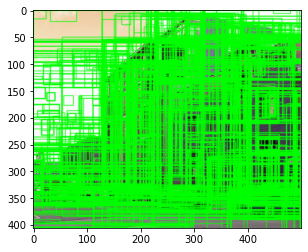

In [75]:
z=0
car_predict=[]
for e,i in enumerate(os.listdir(data_jpeg_dir)):
    if i.startswith("000004"):
        z += 1
        img = cv2.imread(os.path.join(data_jpeg_dir,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        for e,result in enumerate(ssresults):
            if e < 2000:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                car_predict.append(out[0][0])
                print(out)
                print(x,y,w,h)
                #if out[0][0] > 0.70:
                cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        plt.figure()
        plt.imshow(imout)
        break

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

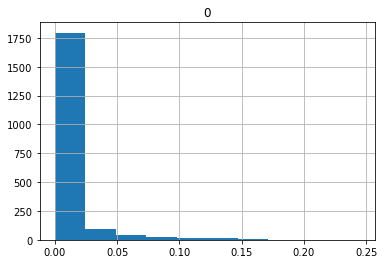

In [79]:
car_predict = pd.DataFrame(car_predict)
car_predict.hist()

In [ ]:
# 히스토그램 그려보기

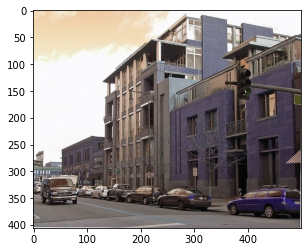

In [65]:
img = cv2.imread('./data/voc_car/JPEGImages/000004.jpg')
img_copy = img.copy()
plt.imshow(img_copy)

In [66]:
a = pd.read_csv('./data/voc_car/car_Annotations/000004.csv', header=None)
a

,0
0,"(13, 311, 84, 362)"
1,"(362, 330, 500, 389)"
2,"(235, 328, 334, 375)"
3,"(175, 327, 252, 364)"
4,"(139, 320, 189, 359)"
5,"(108, 325, 150, 353)"
6,"(84, 323, 121, 350)"


In [67]:
a.shape

(7, 1)

In [68]:
value = []
for i in range(a.shape[0]):
    x1 = int(a[0][i].split(", ")[0][1:])
    y1 = int(a[0][i].split(", ")[1])
    x2 = int(a[0][i].split(", ")[2])
    y2 = int(a[0][i].split(", ")[3][:-1])
    value.append({"x1":x1,"y1":y1,"x2":x2,"y2":y2}) 

In [69]:
value

[{'x1': 13, 'y1': 311, 'x2': 84, 'y2': 362},
 {'x1': 362, 'y1': 330, 'x2': 500, 'y2': 389},
 {'x1': 235, 'y1': 328, 'x2': 334, 'y2': 375},
 {'x1': 175, 'y1': 327, 'x2': 252, 'y2': 364},
 {'x1': 139, 'y1': 320, 'x2': 189, 'y2': 359},
 {'x1': 108, 'y1': 325, 'x2': 150, 'y2': 353},
 {'x1': 84, 'y1': 323, 'x2': 121, 'y2': 350}]

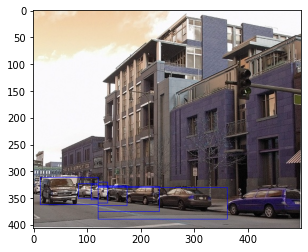

In [71]:
blue = (0,0,255)
for i in range(len(value)):
    left = value[i]['x1']
    top = value[i]['y1']
    rignt = value[i]['x2']
    bottom = value[i]['y2']
    
    
    img_copy = cv2.rectangle(img_copy, (left,top),(right,bottom),blue,0)
plt.imshow(img_copy)

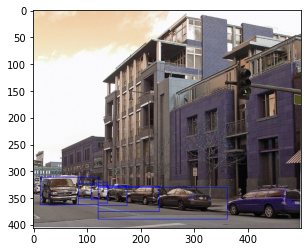

In [73]:
img_copy = cv2.rectangle(img_copy,(13,311),(84,362),blue,0)
plt.imshow(img_copy)

In [66]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from torchvision.models import alexnet
import torch
import torch.nn as nn
model = alexnet()

In [58]:
if torch.cuda.is_available():
    model.cuda()
from torchsummary import summary
summary(model,input_size=(3,244,244))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 60, 60]          23,296
              ReLU-2           [-1, 64, 60, 60]               0
         MaxPool2d-3           [-1, 64, 29, 29]               0
            Conv2d-4          [-1, 192, 29, 29]         307,392
              ReLU-5          [-1, 192, 29, 29]               0
         MaxPool2d-6          [-1, 192, 14, 14]               0
            Conv2d-7          [-1, 384, 14, 14]         663,936
              ReLU-8          [-1, 384, 14, 14]               0
            Conv2d-9          [-1, 256, 14, 14]         884,992
             ReLU-10          [-1, 256, 14, 14]               0
           Conv2d-11          [-1, 256, 14, 14]         590,080
             ReLU-12          [-1, 256, 14, 14]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [60]:
X_tensor = torch.FloatTensor(X_new)
y_tensor = torch.FloatTensor(y_new)
print(X_tensor.shape)
print(y_tensor.shape)

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:75] data. DefaultCPUAllocator: not enough memory: you tried to allocate 13364477952 bytes. Buy new RAM!

In [257]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in sss.split(X_tensor, y_tensor):
    print('train:', train_index, 'test:', test_index)
    print(len(train_index), len(test_index))

train: [ 9235 20881 20310 ...  4168 16987 13321] test: [ 3075  2254 12623 ...   684 11440 17986]
17662 4416


In [ ]:
from torch.utils.data import Subset

train_ds = Subset()

In [255]:
# LOADER 지정
train_loader = torch.utils

In [256]:
from torch.ults.data import TensorDataset
ds = TensorDataset(X_tensor, y_tensor)

NameError: name 'TensorDataset' is not defined

In [ ]:
DataLoader(ds, batch_size=32, shuffle=True)